# Finite Markov Chains

## Outline
- [Invariant distribution](#invariant)
- [Simulation](#simulation)
- [Discretization](#discretization)
- [Integration](#integration)

## <div id="invariant"></div>Markov chain invariant distribution

Recall that finite Markov chains generally have invariant distributions. The invariant distribution $\mu$ satisfies
$$\mu=\mu \mathbf{P}$$
where $\mathbf{P}$ is the transition matrix.
It turns out that the invariant distribution can also be found through iterations. However, the convergence proof is actually quite difficult.

In [1]:
import numpy as np

markov_state = np.array([1,3])
markov_trans = np.array([[0.8,0.2],[0.3,0.7]])

eig_val, eig_vec = np.linalg.eig(markov_trans.T)
dist_inv = eig_vec[:,0]/np.sum(eig_vec[:,0])

print(markov_state)
print('\n', markov_trans)
print('\n', dist_inv)
print('\n', np.linalg.matrix_power(markov_trans,100))

[1 3]

 [[ 0.8  0.2]
 [ 0.3  0.7]]

 [ 0.6  0.4]

 [[ 0.6  0.4]
 [ 0.6  0.4]]


### Example 1

Write a program which generates random valid Markov transition matrices of any finite size
1. Find the invariant distribution such that the max difference of the distribution between iterations is less than $10^{-4}$
2. Compute the average number of iterations it takes to reach this tolerance level for a $5\times5$ transition matrix
3. Optimize the algorithm

In [2]:
import numpy as np

n = 5
tol = 10e-4
markov_trans = np.random.randint(0,11,(n,n))

row_sum = np.sum(markov_trans,1)
row_sum = np.reshape(row_sum,(n,1))
row_sum_matrix = row_sum@np.ones((1,n))

markov_trans = markov_trans/row_sum_matrix

print(markov_trans)

dist_old = np.zeros(n)
dist_new = np.ones(n)/n
dist_ctr = 0

while np.max(np.abs(dist_old-dist_new)) > tol:
    dist_old = np.copy(dist_new)
    dist_new = dist_old@markov_trans
    dist_ctr += 1

print('dist_ctr', dist_ctr, '\ndist_old', dist_old, '\ndist_new', dist_new)


eig_val, eig_vec = np.linalg.eig(markov_trans.T)
dist_inv = eig_vec[:,0]/np.sum(eig_vec[:,0])
print('dist_inv', np.real(dist_inv))

[[ 0.          0.11111111  0.33333333  0.11111111  0.44444444]
 [ 0.21428571  0.21428571  0.          0.5         0.07142857]
 [ 0.23076923  0.25641026  0.05128205  0.20512821  0.25641026]
 [ 0.06060606  0.3030303   0.24242424  0.15151515  0.24242424]
 [ 0.11111111  0.37037037  0.07407407  0.14814815  0.2962963 ]]
dist_ctr 4 
dist_old [ 0.12689423  0.26502309  0.12534027  0.2454954   0.23724701] 
dist_new [ 0.12695463  0.26529036  0.12581367  0.24466571  0.23727563]
dist_inv [ 0.12704059  0.26522909  0.12570276  0.24475091  0.23727664]


## <div id="simulation"></div>Markov chain simulation

### Example 2

Suppose we have three states $\epsilon\in\{\epsilon_{l}=1,\epsilon_{m}=2,\epsilon_{h}=4\}$ and Markov transition matrix

$$\mathcal{E}=\left[\begin{array}{ccc}
0.7 & 0.2 & 0.1\\
0.4 & 0.5 & 0.1\\
0.1 & 0.3 & 0.6
\end{array}\right].$$

Simulate the Markov process for 100 periods and plot the result.

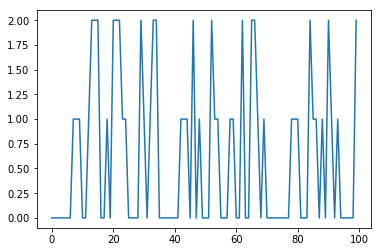

In [3]:
import numpy as np
import matplotlib.pyplot as plt

sim_num = 100
markov_state = np.array([1,2,4])
markov_trans = np.array([[0.7,0.2,0.1],[0.4,0.5,0.1],[0.1,0.3,0.6]])
markov_sim = np.zeros(sim_num,int)
markov_cdf = np.cumsum(markov_trans,1)

for tt in range(1,sim_num):
    markov_sim[tt] = np.sum(np.random.rand()>markov_cdf[markov_sim[tt-1],:])

plt.plot(markov_sim)
plt.show()

## <div id="discretization"></div>Discretization of an AR1 process

Suppose we want to simulate an autoregressive process of order 1. Mathematically, an AR1 process is given by $x_t=c+\rho x_{t-1}+\epsilon_t$ where $\rho \in (-1,1)$ and $\epsilon_t$ is a white noise process with mean zero and standard deviation $\sigma_\epsilon^2$.

### Example 3

1. Simulate and plot the following AR1 process for 200 periods: $x_t=0.5+0.9 x_{t-1}+\epsilon_t$ and $\epsilon_t \sim \mathcal{N}(0,0.2)$. Start the simulation at the mean value.
2. Again, simulate and plot the following Markov process for 200 periods.
3. Plot the two series from Parts 1 and 2 together. What do you see?

In [4]:
import numpy as np

markov_state = np.array([4.358, 4.756, 5.0, 5.244, 5.642])
markov_trans = np.array([[7.497e-01, 2.161e-01, 3.220e-02, 2.028e-03, 1.811e-05], \
                         [2.161e-01, 4.708e-01, 2.569e-01, 5.422e-02, 2.027e-03], \
                         [3.220e-02, 2.569e-01, 4.218e-01, 2.569e-01, 3.220e-02], \
                         [2.027e-03, 5.422e-02, 2.569e-01, 4.708e-01, 2.161e-01], \
                         [1.811e-05, 2.028e-03, 3.220e-02, 2.161e-01, 7.497e-01]])

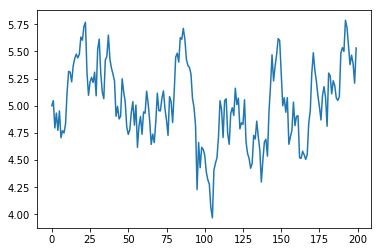

In [5]:
import matplotlib.pyplot as plt

sim_num = 200
ar1_sim = np.zeros(sim_num)
c, ρ, σ = 0.5, 0.9, 0.2
ar1_sim[0] = c/(1-ρ)

for tt in range(1,sim_num):
    ar1_sim[tt] = c+ρ*ar1_sim[tt-1]+np.random.randn()*σ

plt.plot(ar1_sim)
plt.show()

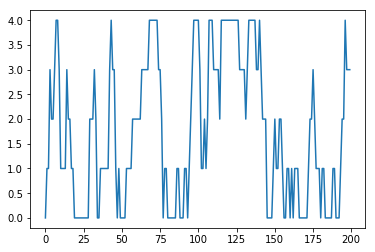

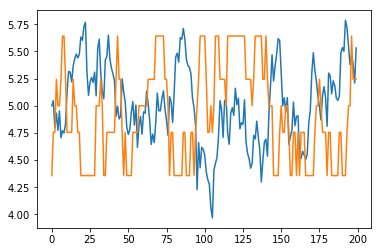

In [6]:
markov_sim = np.zeros(sim_num,int)
markov_cdf = np.cumsum(markov_trans,1)

for tt in range(1,sim_num):
    markov_sim[tt] = np.sum(np.random.rand()>markov_cdf[markov_sim[tt-1],:])

plt.plot(markov_sim)
plt.show()

plt.plot(np.arange(sim_num),ar1_sim,np.arange(sim_num),markov_state[markov_sim])
plt.show()

## <div id="integration"></div>Numerical integration

How do we numerically integrate a function? Riemann integration is probably the simplest method.

### Example 4
1. Numerically integrate $f(x)=e^x$ between 0 and 3, i.e. find $\int_0^3 e^x dx$. Try using the left point, right point, and midpoint for each interval.
2. How many points do you need to get a tolerance of below $10^{-3}$ for the left point, right point, and midpoint rules?

In [14]:
import numpy as np

def int_tol(x_num):
    x_min, x_max = 0, 3
    x = np.linspace(x_min, x_max, x_num)
    y = np.exp(x)
    x_interval = x[1:]-x[0:-1]
    integral = np.sum(y[1:]*x_interval)
    return np.abs(np.exp(3)-1-integral)

ii = 2
while int_tol(ii) > 1e-3:
    ii += 1

print(ii)

28630


## Homework exercise

1. Download the 1990-2014 Chinese real GDP data from the Federal Reserve Bank of St. Louis database (FRED) at the link,
    https://fred.stlouisfed.org/series/RGDPNACNA666NRUG

2. Take the log of real GDP (i.e. $y_{t}=\log Y_{t}$) and compute its growth rate (i.e. $g_{t}=y_{t}-y_{t-1}$). Run an AR1 regression both on log levels $y_{t}$ and growth rates $g_{t}$.

3. For the real GDP growth rates, use the Adda-Cooper method (pages 56-60) to estimate the Markov values and transition matrix with 5 states. Hint: you may want to do the following import: **from scipy.stats import norm**.

4. Plot the growth rate data series, the AR1 simulated series, and the 5 state Markov process for 100 realizations.

5. Bonus: Use maximum likelihood to estimate the AR1 parameters from the finite-state Markov process.